In [62]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 150
import numpy as np
import math
from scipy import stats
sns.set()




In [63]:
pd.options.display.width = 1000

In [64]:
parasweep = pd.read_csv("fox_rabbit3D_multipara.csv")

<AxesSubplot: xlabel='runtime', ylabel='Density'>

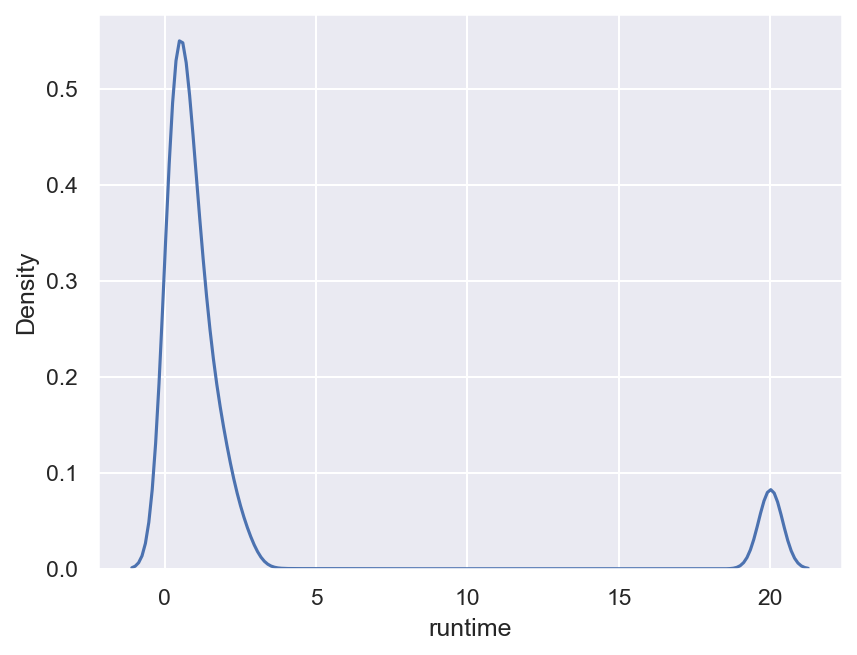

In [67]:
sns.kdeplot(data=parasweep, x="runtime")

In [72]:
# Exclude those taking less than 17 seconds to exclude everything that looks like a timeout.
# We exclude these because we don't expect linear running time in those cases.
para_under_20 = parasweep[parasweep["runtime"]<17]
para_under_20

,runtime,The number of rabbits,The number of foxes,r_birth,f_birth,f_death,number_of_trajectories,Timespan
0,0.544513,1157.000000,1152.000000,5.0,0.005,5.000000,1,20
1,0.391062,1139.000000,563.000000,5.0,0.005,6.666667,1,20
2,0.371088,3011.000000,253.000000,5.0,0.005,8.333333,1,20
3,0.198700,580.000000,80.000000,5.0,0.005,10.000000,1,20
4,0.437672,757.000000,717.000000,5.0,0.005,11.666667,1,20
...,...,...,...,...,...,...,...,...
431993,2.475081,523.000000,857.714286,100.0,0.100,76.315789,7,40
431994,2.352409,860.142857,938.000000,100.0,0.100,80.263158,7,40
431995,2.411189,1102.857143,893.142857,100.0,0.100,84.210526,7,40
431996,2.469272,361.428571,1532.571429,100.0,0.100,88.157895,7,40


<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
_NoDefault.no_default
.
<enum '_NoDefault'>
The model param values here are: (5.0, 0.005, 5.0)
The model param values here are: (5.0, 0.005, 5.789473684210527)
The model param values here are: (5.0, 0.005, 6.578947368421053)
The model param values here are: (5.0, 0.005, 6.666666666666667)
The model param values here are: (5.0, 0.005, 7.368421052631579)
The model param values here are: (5.0, 0.005, 8.157894736842106)
The model param values here are: (5.0, 0.005, 8.333333333333334)
The model param values here are: (5.0, 0.005, 8.947368421052632)
The model param values here are: (5.0, 0.005, 9.736842105263158)
The model param values here are: (5.0, 0.005, 10.0)
The model param values here are: (5.0, 0.005, 10.526315789473683)


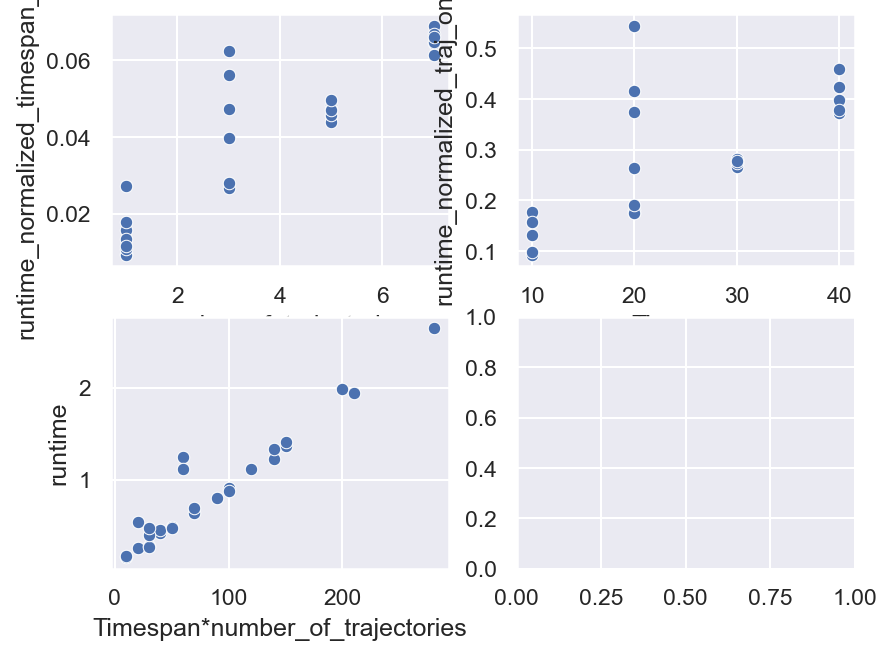

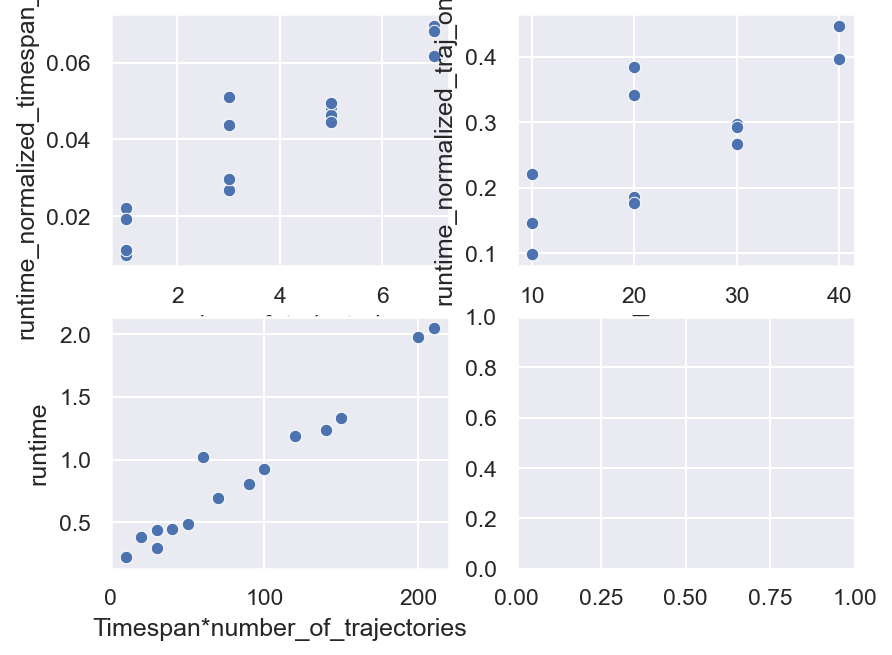

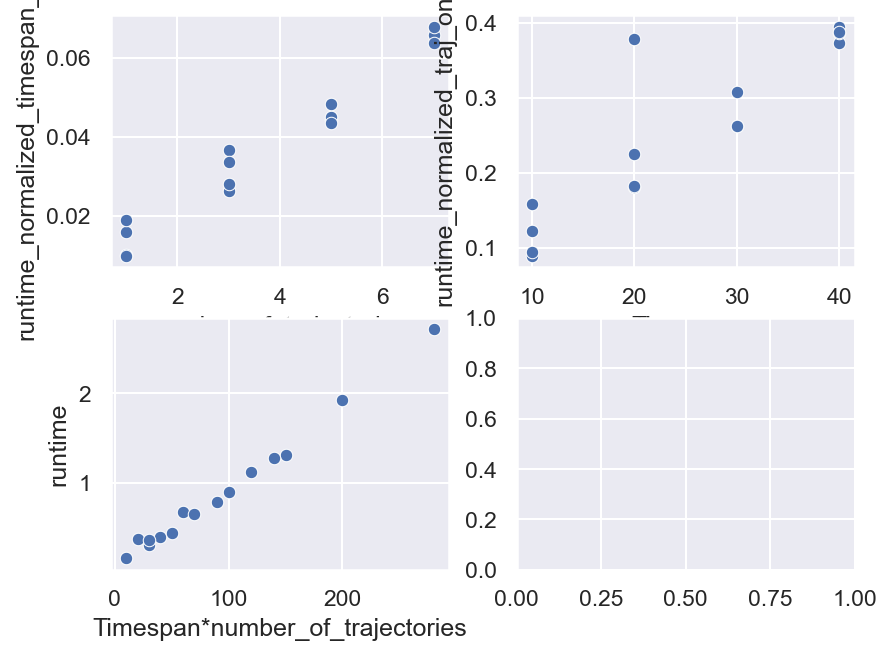

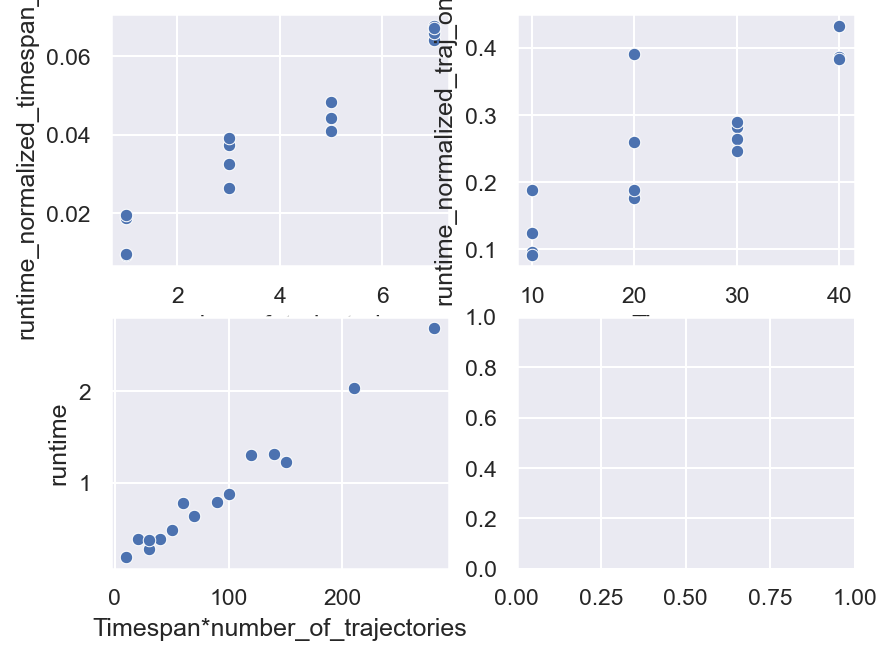

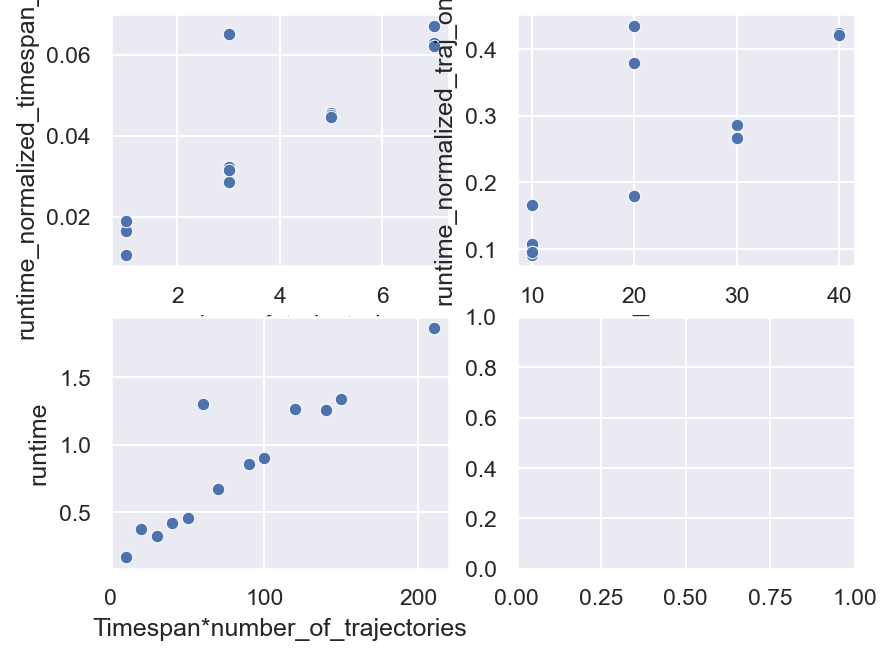

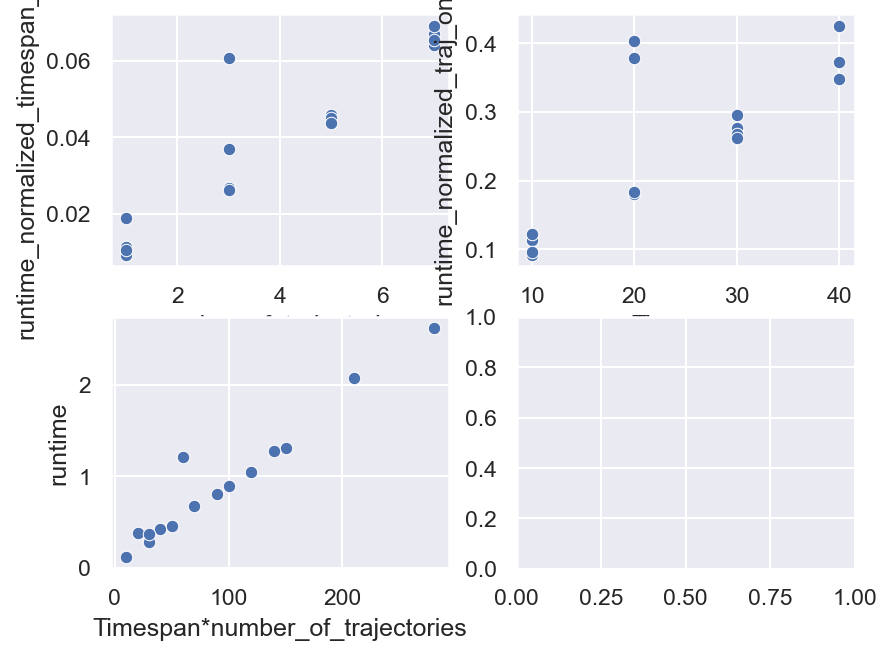

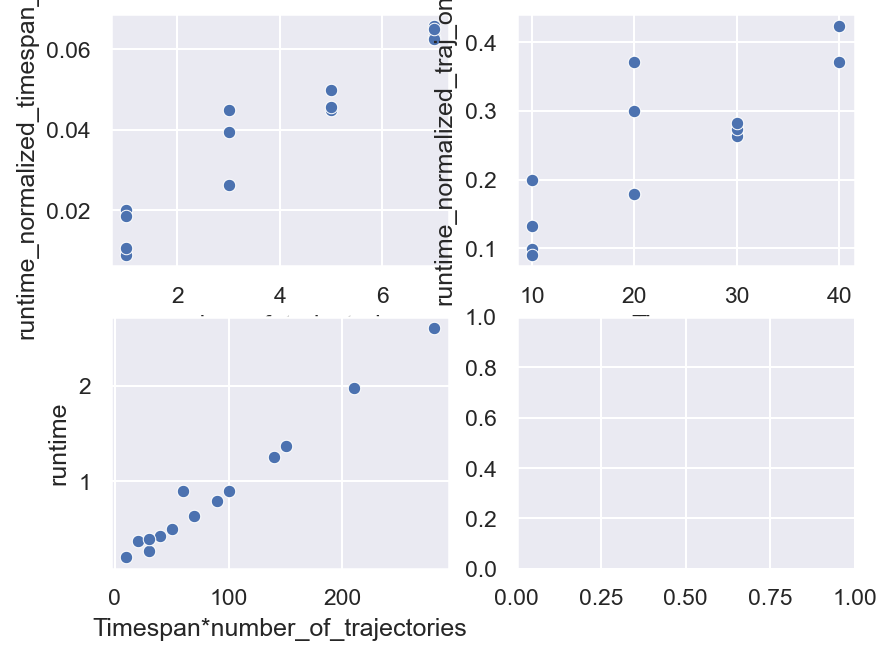

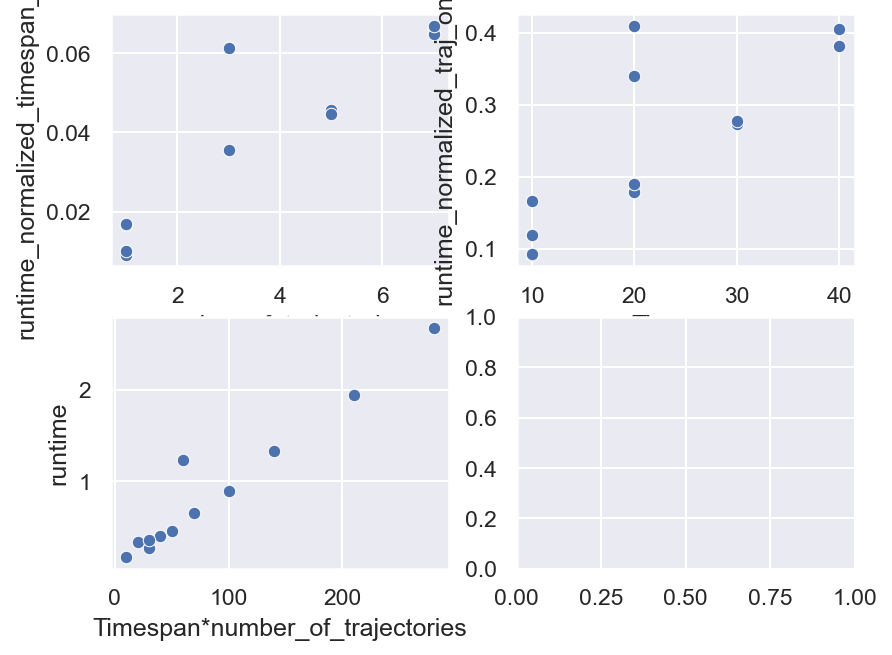

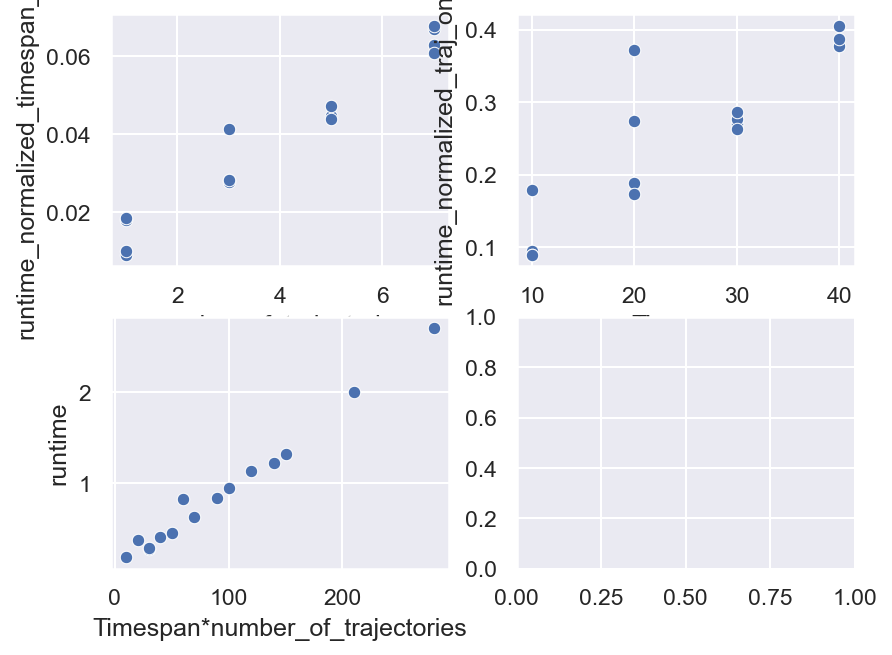

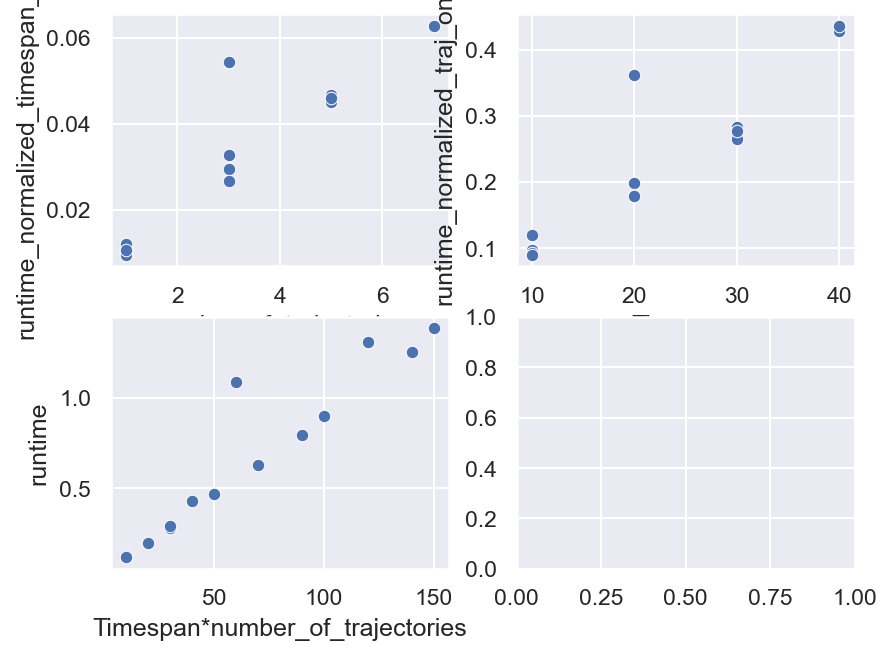

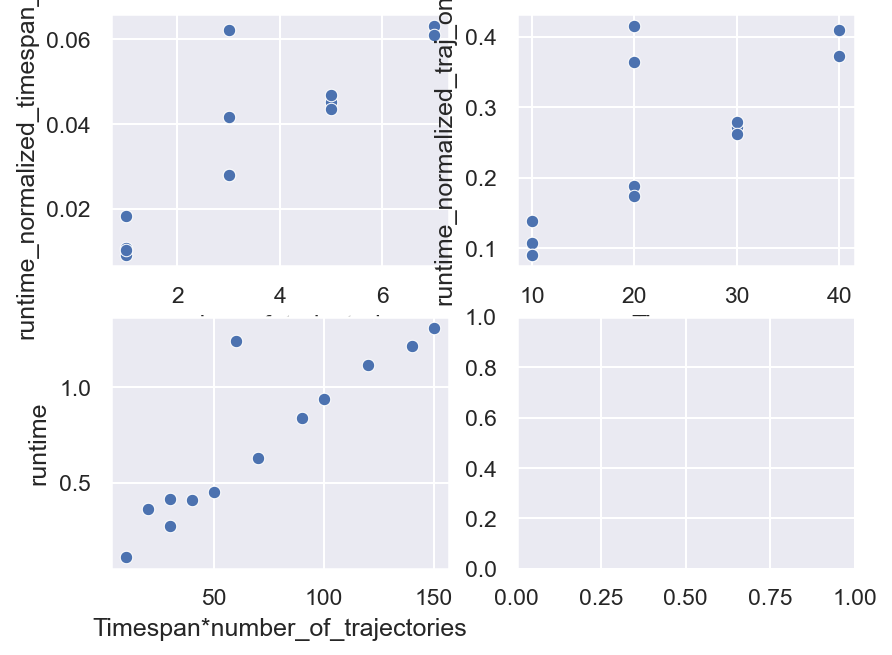

In [87]:
# We expect the running time to be, in general, non-linear with respect to the model parameters.
# So, lets group the results by the model parameters and treat each group separately.
para_under_20_groups = para_under_20.groupby(['r_birth','f_birth','f_death'])

# Lets look at a selection of groups:
i = 0
for k,v in para_under_20_groups:
    print(f'The model param values here are: {k}')
    group = para_under_20_groups.get_group(k)
    group = group.copy()
    # Get the result with the lowest num traj and Timespan, we'll use this as the basis.
    group.sort_values(['number_of_trajectories','Timespan'], inplace=True)
    group = group.reset_index()

    fig, axes = plt.subplots(2, 2)

    # Normalize by the timespan, plot the nnumber_of_trajectories vs runtime.
    group['runtime_normalized_timespan_only'] = group['runtime'] / group['Timespan']
    sns.scatterplot(group, x='number_of_trajectories', y='runtime_normalized_timespan_only',ax=axes[0,0])

    # Normalize by the number_of_trajectories, plot the Timespan vs runtime
    group['runtime_normalized_traj_only'] = group['runtime'] / group['number_of_trajectories']
    sns.scatterplot(group, x='Timespan', y='runtime_normalized_traj_only',ax=axes[0,1])

    # Plot the timespan * trajs vs runtime
    group['Timespan*number_of_trajectories'] = group['Timespan'] * group['number_of_trajectories']
    sns.scatterplot(group, x='Timespan*number_of_trajectories', y='runtime',ax=axes[1,0])

    #print(group)

    i = i + 1
    if (i > 10):
        break

# We see clearly that the lowerbound is linear in each case. But several values are above. We don't know why.